<h1>TEAM NAME: ADANSO

    
<h3>Team Members:<br><br>
1. Adarsh Anand <br>
2. Aniket Chaudhri <br>
3. Somesh Agrawal

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [104]:
df = pd.read_csv('faithful.csv')
df= df.drop('Unnamed: 0',axis=1)

In [105]:
df.columns = ['eruptions','waiting']

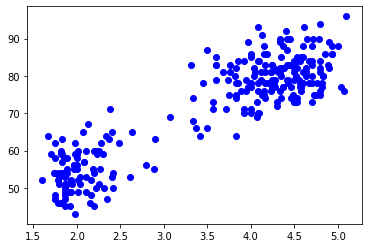

In [106]:
plt.scatter(df["eruptions"],df['waiting'], c = 'blue', marker = 'o',label = 'Displaying points on a graph'  )
plt.show()

In [107]:
def calculatez(mean, covariance):
    x, y = np.mgrid[1:6:.5, 20:100:.5]
    data = np.column_stack([x.flat, y.flat])
    z = mvn.pdf(data,mean, covariance).reshape(x.shape)
    return x,y,z

In [108]:
def Estep(X,mean,covariance,coeff):
    K=covariance.shape[0]
    gamma = np.zeros(shape=(X.shape[0], K))
    for k in range(K):
        gamma[:, k] = mvn.pdf(X, mean[k], covariance[k]) * coeff[k]
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    return gamma

In [109]:
def Mstep(X,gamma):
    N=X.shape[0]
    K=gamma.shape[1]
    pi = np.sum(gamma, axis=0)/np.sum(gamma)
    mean = X[np.random.choice(N, size=K, replace=False), :]
    covariance = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float)
    for k in range(K):
        mean[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
        covariance[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mean[k, :]).reshape(N, X.shape[1], 1)@(X-mean[k, :]).reshape(N, 1, X.shape[1])), axis=0) /np.sum(gamma[:, k])
    return mean, covariance, pi

In [111]:
def logLikelihood(X,gamma,covariance,mean,pi):
    K = mean.shape[0]
    likelihood=0
    for k in range(K):
        likelihood += np.sum(gamma[:, k] * (np.log(mvn.pdf(X, mean=mean[k], cov=covariance[k])) + np.log(pi[k])))
    return likelihood

In [113]:
def gaussianMixtureModel(df,K,delta=0.0001):
    X=df.values
    N, D = X.shape
    mean = X[np.random.choice(N, size=K, replace=False), :]
    pi = np.ones(shape=(K), dtype=np.float64)/K
    covariance = np.zeros(shape=(K, D, D), dtype=np.float64)
    for d in range(D):
        sigma[:, d, d] = np.var(X[:, d])/10
        
    cur_llh = np.float(1e9)
    prev_llh=0.0
    iter=0
    while(abs(cur_llh-prev_llh)>delta):
        gamma = Estep(X, mu, sigma, pi)
        mean, covariance, pi = Mstep(X, gamma)
        
        prev_llh = cur_llh
        cur_llh = logLikelihood(X, gamma, covariance, mean, pi)

        labels = np.argmax(gamma, axis=1)
        iter=iter+1
        plt.figure()
        c=['blue','red','black']

        plt.scatter(df['eruptions'], df['waiting'],c=gamma[:,1],cmap='cool')
        for i in range(0,K):
            x,y,z=calculatez(mean[i],covariance[i])
            plt.contour(x, y, z,colors=c[i])
        plt.show()


    return mean, covariance, pi, gamma, labels

C:\Users\Somesh\AppData\Local\Temp/ipykernel_8388/1679251824.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cur_llh = np.float(1e9)
C:\Users\Somesh\AppData\Local\Temp/ipykernel_8388/3426941865.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covariance = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float)


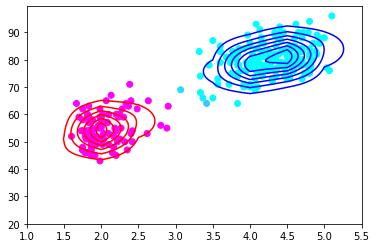

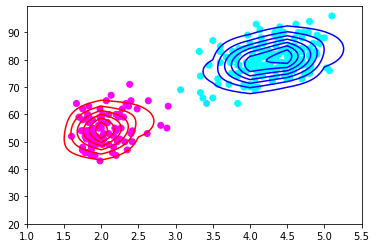

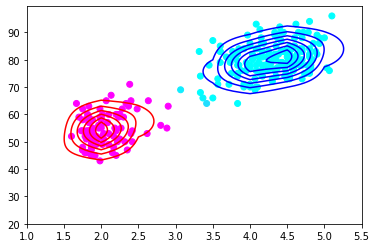

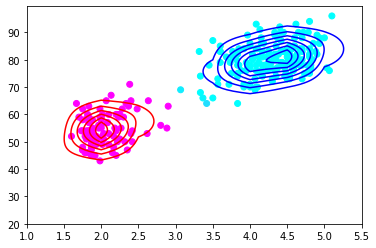

In [114]:
mean, covariance, pi, gamma, labels=gaussianMixtureModel(df,2)